# Jison

O **Jison** é uma API para criar parsers em JavaScript. As duas fontes principais de informação são o repositório no Github (https://github.com/zaach/jison) e o site (http://jison.org). Conforme a própria documentação:

> Jison gera um parser bottom-up em JavaScript. Jison recebe uma gramática livre de contexto como entrada e gera um arquiv JavaScript capaz de fazer parser da linguagem descrita pela gramática. A partir daí é possível gerar um script para fazer parser de entradas e aceitar, rejeitar ou realizar ações com base na entrada.


## Instalação

A instalação pode ser feita utilizando node (npm) ao executar o comando:

```
npm install -g jison 
```

> **Obsevação**: recentemente (abril/2018) estão ocorrendo problemas na instalação, provavelmente ocasionados por conflitos de versões com dependências. Além disso o projeto original parou de receber atualizações em 2013. Um fork do jison (https://github.com/GerHobbelt/jison) está com mais atualizações e pode ser instalado usando o pacote `jison-gho`: 
>
> `npm install -g jison-gho`


## Especificando a linguagem para uma calculadora

O processo de **tradução** de uma linguagem comumente envolve inicialmente duas fases: análise léxica (criação de tokens) e análise sintática, pelas quais as ferramentas Lex/Yacc e Flex/Bison são tão famosas. 

Jison permite especifiar um **tradutor** utilizando dois arquivos (um para regras léxicas e outro para a gramática) ou um só arquivo (com as regras léxicas juntas com a gramática, como demonstra a seção a seguir).

### Interpretador para uma linguagem matemática: Calculadora

O código a seguir, para o arquivo `calculadora.jison` apresenta uma linguagem para uma calculadora.

```
/* descrição: Representa uma linguagem para um interpretador de expressões matemáticas. */

/* regras léxicas */
%lex
%%

\s+                   /* skip whitespace */
[0-9]+("."[0-9]+)?\b  return 'NUMBER'
"*"                   return '*'
"/"                   return '/'
"-"                   return '-'
"+"                   return '+'
"^"                   return '^'
"!"                   return '!'
"%"                   return '%'
"("                   return '('
")"                   return ')'
"PI"                  return 'PI'
"E"                   return 'E'
<<EOF>>               return 'EOF'
.                     return 'INVALID'

/lex

/* associação entre operadores e precdência */

%left '+' '-'
%left '*' '/'
%left '^'
%right '!'
%right '%'
%left UMINUS

%start expressions

%% /* regras de produção */

expressions
    : e EOF
        { return $1; }
    ;

e
    : e '+' e
        {$$ = $1+$3;}
    | e '-' e
        {$$ = $1-$3;}
    | e '*' e
        {$$ = $1*$3;}
    | e '/' e
        {$$ = $1/$3;}
    | e '^' e
        {$$ = Math.pow($1, $3);}
    | e '!'
        {{
          $$ = (function fact (n) { return n==0 ? 1 : fact(n-1) * n })($1);
        }}
    | e '%'
        {$$ = $1/100;}
    | '-' e %prec UMINUS
        {$$ = -$2;}
    | '(' e ')'
        {$$ = $2;}
    | NUMBER
        {$$ = Number(yytext);}
    | E
        {$$ = Math.E;}
    | PI
        {$$ = Math.PI;}
    ;
```

O interpretador é criado usando o comando a seguir

```
jison calculadora.jison -c 2 -x
```

As opções do comando são:

* `-c 2`: representa o nível de otimização da gramática (0 a 2)
* `-x`: indica que será criada uma função **main**

O comando cria o arquivo `calculadora.js` no diretório atual, que representa o interpretador da linguagem Calculadora. O interpretador pode, então, ser usado para fazer a execução de um "programa" na linguagem Calculadora. 

Para exemplificar, o arquivo a seguir `teste.calc` segue a gramática definida anteriormente:

```
2 ^ 32 / 1024 
```

Para executar o programa `teste.calc` deve ser usado o interpretador:

```
node calculadora teste.calc
```

A saída é:

```
parser output:

 { type: 'number', value: 4194304 }


or as JSON:
 4194304
```

ou seja, matemáticamente, como esperado, a saída é o resultado de $\frac{2^{32}}{1024}$.

O Jison também disponibiliza o interpretador na forma de um **parser**, que pode ser usado em um programa JavaScript (também pode ser usado no browser). Para exemplificar, segue o conteúdo do arquivo `modulo.js`:

```javascript
var parser = require("./calculadora").parser;

function exec (input) {
    return parser.parse(input);
}

var vinte = exec("4 * 5");
```

E, para executar, o comando:

```
node modulo
```

Quando ocorre um erro na interpretação essa informação também é apresentada. Por exemplo, conteúdo do arquivo `teste-erro.calc`:

```
2 - ^ 32 / 1024 -
```

Assim o interpretador da linguagem Calculadora fornecerá uma saída semelhante à seguinte:

```
JisonParserError: Parse error on line 1:
2 - ^ 32 / 102...
----^
Expecting "-", "(", "E", "NUMBER", "PI", "e", got unexpected "^"
```

A saída indica onde encontra-se o erro e o que a gramática (pelas regras gramaticais) estaria esperando.

## Usando o debugger do Jison

A ferramenta Jison Debugger pode ser acessada por meio do endereço (http://nolanlawson.github.io/jison-debugger/). A ferramenta recebe duas entradas: a gramática e um texto; além disso fornece como saída: a gramática em JavaScript, a gramática em JSON, os tokens, a AST e o resulado da interpretação da entrada. A imagem a seguir mostra os tokens, a AST e a saída para a entrada `1 + 2` e considera a gramática da linguagem Calculadora (apresentada na seção anterior).

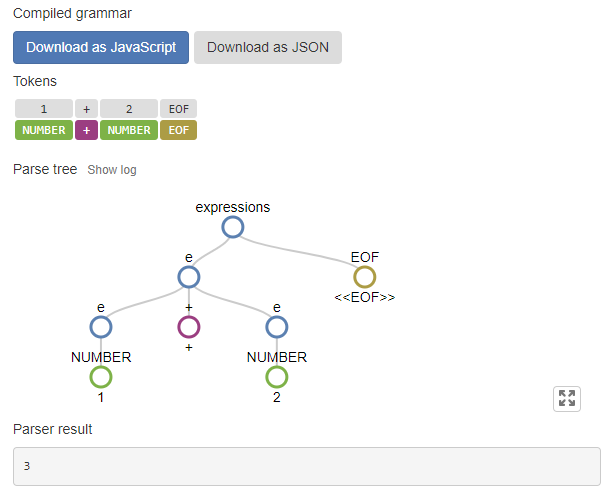

Como a figura apresenta a saída mostra os tokens (e a identificação de cada um) e a AST.

## Usando o interpretador no browser

O interpretador também pode ser usado no browser, como mostra o trecho de código a seguir:

```html
<html lang="pt-br">
    <script src="calculadora.js"></script>
    <script>
    var entrada = '1+2*5';
    try {
        var resultado = calculadora.parse(entrada);
        console.log(resultado);
    } catch (e) {
        console.log(String(e));
    }
    </script>
</html>
```

Assim, basta importar o arquivo JavaScript `calculadora.js` e usar o objeto `calculadora`, chamando o método `calculadora.parse()` e o argumento sendo a entrada (o programa).

## Especificando uma linguagem

O arquivo `.jison` possui uma estrutura básica:

```
/* regras léxicas */
%lex
...
%%
/lex

/* regras sintáticas (gramática) */
%%
...
```

A composição do arquivo é:
* regras léxicas; e
* regras gramaticais



## Regras léxicas

As regras léxicas são compostas por duas partes:
1. conjunto de caracteres ou expressão regular que define a estrutura do token (ou seja, um padrão)
2. nome do token

**Exemplo:**

```
[0-9]+("."[0-9]+)?\b  return 'NUMBER';
```

A primeira parte `[0-9]+("."[0-9]+)?\b` é uma expressão regular que combina com tokens que tenham essa estrutura: números de 0 a 9, repetidos uma ou mais vezes, seguidos, opcionalmente, de "." e números de 0 a 9 repetidos uma ou mais vezes. O metacaractere `\b` indica que o número deve estar ao final de uma palavra. 

A segunda parte indica que o identificador do token em questão é `NUMBER` (obrigatório o uso de `return` e aspas).

**Exemplo:**

```
"+"                   return '+';
```

O token `+` é representado pelo próprio símbolo.

### Precedência de operadores

As regras léxicas também incluem a definição de precedência de operadores (sendo a prioridade da menor para a maior):

```
%left '+' '-'
%left '*' '/'
%left '^'
%right '!'
%right '%'
%left UMINUS
```

A declaração `%left` torna os operadores com associação à esquerda e a declaração `%right` os torna com associação à direita. A declaração `%nonassoc` indica que é um erro encontrar o mesmo operador duas vezes na sequência.

Considere a expressão `1 - 2 + 3`. Se for usada associação à esquerda, a expressão é avaliada como `(1 - 2) + 3`. Se for usada associação à esquerda, a expressão é avaliada como `1 - (2 + 3)`. Para operadores, geralmente será usada associação à esquerda. Para atribuição, geralmente é usada associação à direita.

A ordem dessas declarações influencia o grau de precedência. No exemplo, os operadores `+` e `-` têm menor precedência, enquanto o operador `UMINUS` (sinal de negativo `'-'`) tem maior precedência.

Assim, as regras indicam que os operadores `+` e `-` têm a mesma precedência, com associação à esquerda, a qual é inferior à precedência de `*` e `/`.

## Regras sintáticas (gramaticais)

### A declaração `%start`

A declaração `%start` indica o símbolo inicial da gramática. Exemplo:

```
%start expressions
```

Indica que o símbolo inicial da gramática é o não-terminal `expressions`.

A sintaxe de uma regra gramatical é:

```
nao-terminal:  componentes...
            ;
```

Onde:
* `nao-terminal` é o símbolo não-terminal que é descrito na regra; e
* `componentes` é composto por símbolos terminais e não-terminais

**Exemplo:**

```
expressao:  expressao '+' expressao
          | expressao '-' expressao
          | expressao '*' expressao
          | expressao '/' expressao
          ;
```

A regra indica que o não-terminal `expressao` é formado por múltiplas regras, separadas por `|`, o que indica disjunção.

### Regras recursivas

Uma regra pode ser recursiva à esquerda ou à direita. Exemplo:

```
expressao:   numero
           | expressao '+' numero
           ;
```

A regra que define o não-terminal `expressao` é recursiva à esquerda, pois este não-terminal aparece novamente no lado direito, mais à esquerda.

Outro exemplo:

```
expressao:   numero
           | numero '+' expressao
           ;
```

A regra agora é recursiva à direita, pois o não-terminal aparece no lado direito, mais à direita.

**Em Jison, utilize regras recursivas à esquerda.**

## Semântica

A semântica de uma linguagem é determinada pelos valores associados com vários tokens ou grupos de tokens e pelas ações executadas quando vários agrupamentos são reconhecidos. Exemplo:

```
e
    : e '+' e
        {$$ = $1+$3;}
    | e '-' e
        {$$ = $1-$3;}
```

O símbolo não-terminal `e` é composto por duas regras:
* `e '+' e`
* `e '-' e`

Na sequência de cada regra está presente uma ação, entre `{}`. Para a regra da soma, a ação é `$$ = $1 + $3` e é interpretada da seguinte forma:
* a regra semântica tem três grupos de tokens: `e`, `+` e `e`, suas posições sendo: 1, 2 e 3 (índice iniciando-se em 1)
* `$1` refere-se ao primeiro `e`
* `$2` referente-se ao terminal `'+'`
* `$3` refere-se ao último `e`
* `$n` refere-se ao n-ésimo grupo de tokens da regra
* `$$` refere-se ao **valor semântico** da regra

A ação padrão é `$$ = $1`, ou seja, o valor semântico de uma regra é o valor do primeiro grupo dos tokens da regra.

Jison considera que o valor de `$n` é uma `string`, por isso, conversões de dados podem ser necessárias, utilizando-se funções do JavaScript. É o que ocorre com a regra:

```
e: NUMBER {$$ = Number(yytext);}
```

Neste caso, a função `Number()` é usada para converter `yytext` em um valor numérico. `yytext` representa o texto que representa o grupo de tokens. Como a regra aplica-se a números, então `yytext` contém o número, em si.

